In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('data/train.csv')
df

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,13783,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,23986,52,services,married,high.school,unknown,yes,no,cellular,may,...,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,20663,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,13958,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,28184,47,admin.,single,university.degree,no,no,no,cellular,nov,...,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,27619,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,901,3,failure,-2.9,92.570527,-45.491308,3.533396,5177.336146,yes
22496,16444,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,15,524,3,failure,1.4,92.809945,-27.601325,4.651084,5004.892544,no
22497,25076,27,admin.,married,professional.course,no,yes,no,cellular,may,...,1,757,5,success,-1.8,94.301672,-38.211994,4.092928,4994.439635,no
22498,4587,55,retired,married,high.school,no,yes,no,telephone,may,...,5,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no


In [3]:
df.shape

(22500, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        22500 non-null  int64  
 1   age             22500 non-null  int64  
 2   job             22500 non-null  object 
 3   marital         22500 non-null  object 
 4   education       22500 non-null  object 
 5   default         22500 non-null  object 
 6   housing         22500 non-null  object 
 7   loan            22500 non-null  object 
 8   contact         22500 non-null  object 
 9   month           22500 non-null  object 
 10  day_of_week     22500 non-null  object 
 11  duration        22500 non-null  int64  
 12  campaign        22500 non-null  int64  
 13  pdays           22500 non-null  int64  
 14  previous        22500 non-null  int64  
 15  poutcome        22500 non-null  object 
 16  emp.var.rate    22500 non-null  float64
 17  cons.price.idx  22500 non-null 

In [5]:
df.isna().sum()

RecordID          0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [6]:
df_test = pd.read_csv('data/test.csv')
df_test

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14664,37,technician,single,professional.course,no,yes,yes,cellular,aug,...,3309,1,471,0,success,1.4,92.325519,-33.010270,3.562675,5028.544435
1,25250,26,admin.,single,high.school,no,yes,no,cellular,may,...,2757,2,159,2,success,-1.8,92.591695,-46.129934,3.294182,5025.294022
2,4070,42,blue-collar,married,basic.6y,no,no,no,telephone,may,...,266,3,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000
3,19446,38,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,29,1,433,5,success,-0.1,92.752588,-41.837090,3.318768,5111.327469
4,5111,43,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1684,2,938,3,success,1.1,93.983679,-35.267269,3.833161,5183.822823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,25105,50,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3969,48,290,1,failure,-1.8,94.077494,-39.985944,3.709514,5033.480618
7496,13297,35,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,596,8,424,3,failure,1.4,93.302019,-49.737088,1.766907,5095.562948
7497,26780,53,retired,single,basic.4y,no,yes,no,cellular,jun,...,107,3,999,0,nonexistent,-2.9,92.963000,-40.800000,1.281000,5076.200000
7498,16186,32,technician,married,professional.course,no,no,no,cellular,aug,...,172,3,999,0,nonexistent,1.4,93.444000,-36.100000,4.963000,5228.100000


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        7500 non-null   int64  
 1   age             7500 non-null   int64  
 2   job             7500 non-null   object 
 3   marital         7500 non-null   object 
 4   education       7500 non-null   object 
 5   default         7500 non-null   object 
 6   housing         7500 non-null   object 
 7   loan            7500 non-null   object 
 8   contact         7500 non-null   object 
 9   month           7500 non-null   object 
 10  day_of_week     7500 non-null   object 
 11  duration        7500 non-null   int64  
 12  campaign        7500 non-null   int64  
 13  pdays           7500 non-null   int64  
 14  previous        7500 non-null   int64  
 15  poutcome        7500 non-null   object 
 16  emp.var.rate    7500 non-null   float64
 17  cons.price.idx  7500 non-null   f

In [8]:
df.drop(columns=['RecordID'], axis=1, inplace=True)

In [9]:
def unknown_count(data):
    print("unknown counts\n")
    column_list = data.select_dtypes('O').columns.to_list()
    for i in column_list:
        for j in data[i].unique():
            if j == 'unknown':
                print(i,': ',data[i].value_counts()['unknown'])
                
    print("\nunknown in dataframe",)
    sns.heatmap((data.sort_values(by=['default'], ignore_index=True) == 'unknown'), cbar=False)
    plt.show()

unknown counts

job :  274
marital :  320
education :  994
default :  4860
housing :  886
loan :  889

unknown in dataframe


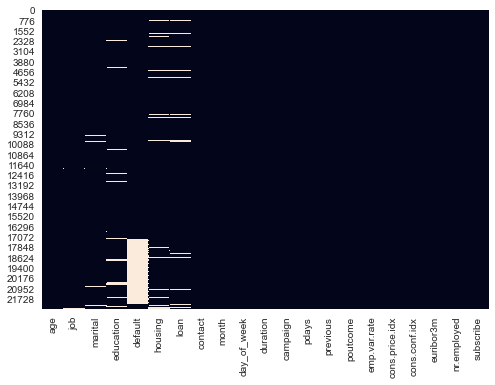

In [10]:
unknown_count(df)

unknown counts

job :  84
marital :  131
education :  336
default :  1597
housing :  300
loan :  306

unknown in dataframe


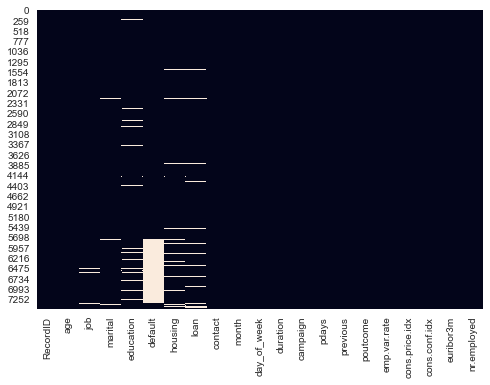

In [11]:
unknown_count(df_test)

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,49,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,...,1,115,2,failure,1.4,92.479703,-35.498996,0.705058,4990.198481,no
1,52,services,married,high.school,unknown,yes,no,cellular,may,mon,...,1,402,2,nonexistent,-1.8,93.439161,-39.331320,4.245479,5144.563621,yes
2,46,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,...,1,999,1,failure,-1.8,93.075000,-47.100000,1.445000,5099.100000,no
3,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,...,28,999,0,nonexistent,1.4,93.444000,-36.100000,4.967000,5228.100000,yes
4,47,admin.,single,university.degree,no,no,no,cellular,nov,tue,...,1,252,4,success,-3.4,94.352376,-33.073620,1.208702,5025.420036,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,admin.,married,high.school,no,no,no,cellular,aug,fri,...,3,901,3,failure,-2.9,92.570527,-45.491308,3.533396,5177.336146,yes
22496,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,fri,...,15,524,3,failure,1.4,92.809945,-27.601325,4.651084,5004.892544,no
22497,27,admin.,married,professional.course,no,yes,no,cellular,may,thu,...,1,757,5,success,-1.8,94.301672,-38.211994,4.092928,4994.439635,no
22498,55,retired,married,high.school,no,yes,no,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no


In [13]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe          object
dtype: object

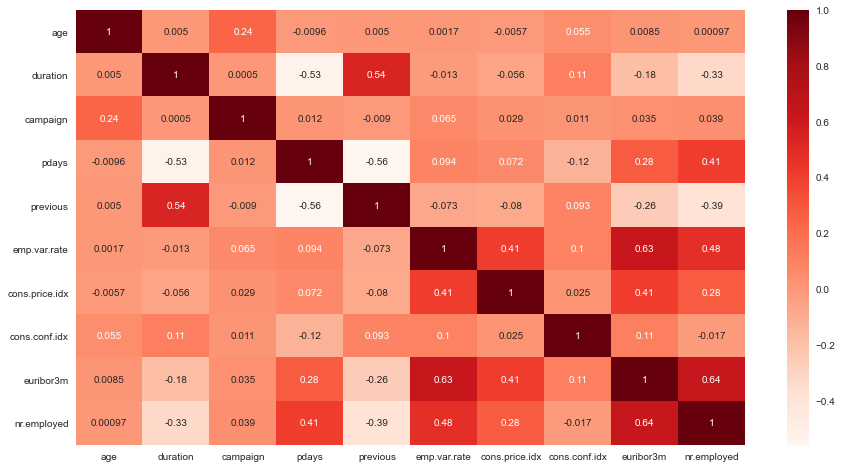

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="Reds")
plt.show()

In [15]:
def compare_categories_in_column(df, column_name):
    # Title
    print(column_name)
    print("-"*len(column_name))
    
    # Table
    table = pd.DataFrame(df[column_name].value_counts().reset_index())
    table.columns = [column_name+'_category', 'count']
    table.index += 1
    table['percentage'] = (table['count'] / table['count'].sum() * 100).round(2)
    display(table)

    # Plot
    ax = sns.countplot(y=column_name, data=df, palette='dark')
    plt.show()

job
---


,job_category,count,percentage
1,admin.,5557,24.70
2,blue-collar,4874,21.66
3,technician,3530,15.69
4,services,2083,9.26
5,management,1600,7.11
6,retired,1006,4.47
7,entrepreneur,863,3.84
8,self-employed,836,3.72
9,housemaid,657,2.92
10,unemployed,647,2.88


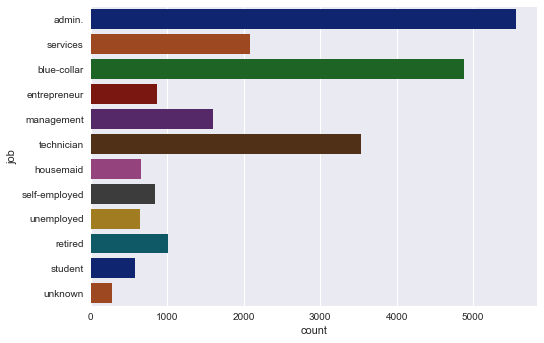

marital
-------


,marital_category,count,percentage
1,married,13178,58.57
2,single,6344,28.20
3,divorced,2658,11.81
4,unknown,320,1.42


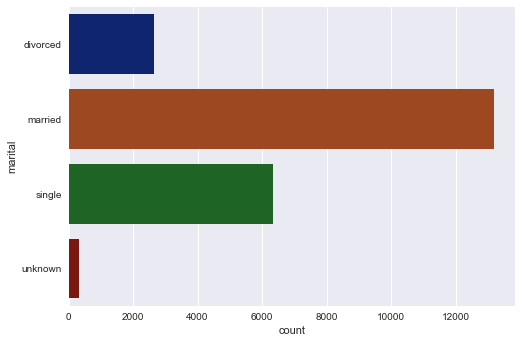

education
---------


,education_category,count,percentage
1,university.degree,6524,29.00
2,high.school,5031,22.36
3,basic.9y,3266,14.52
4,professional.course,2853,12.68
5,basic.4y,2322,10.32
6,basic.6y,1349,6.00
7,unknown,994,4.42
8,illiterate,161,0.72


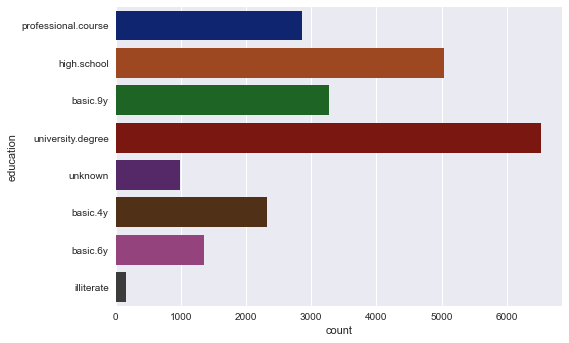

default
-------


,default_category,count,percentage
1,no,17261,76.72
2,unknown,4860,21.60
3,yes,379,1.68


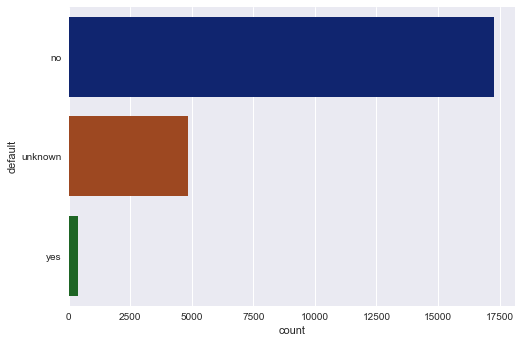

housing
-------


,housing_category,count,percentage
1,yes,11568,51.41
2,no,10046,44.65
3,unknown,886,3.94


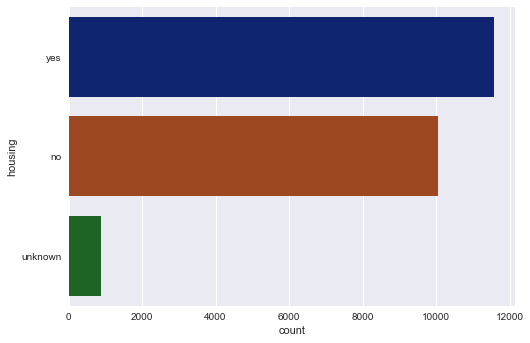

loan
----


,loan_category,count,percentage
1,no,17954,79.80
2,yes,3657,16.25
3,unknown,889,3.95


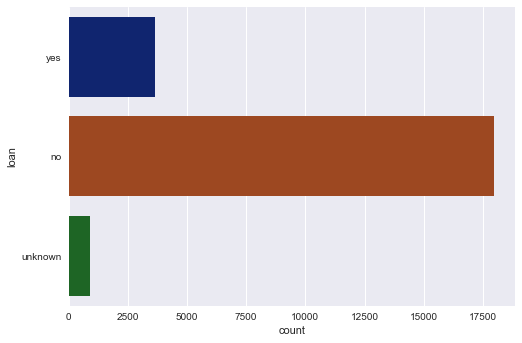

contact
-------


,contact_category,count,percentage
1,cellular,14181,63.03
2,telephone,8319,36.97


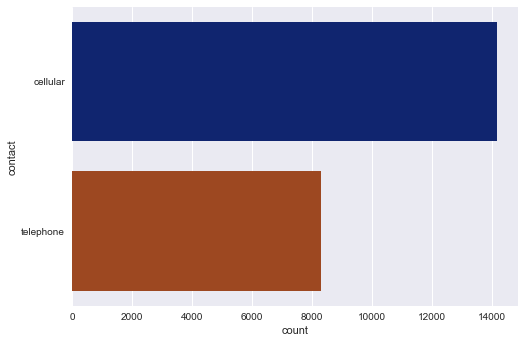

month
-----


,month_category,count,percentage
1,may,7235,32.16
2,jul,3815,16.96
3,aug,3340,14.84
4,jun,2838,12.61
5,nov,2242,9.96
6,apr,1510,6.71
7,oct,494,2.20
8,mar,426,1.89
9,sep,401,1.78
10,dec,199,0.88


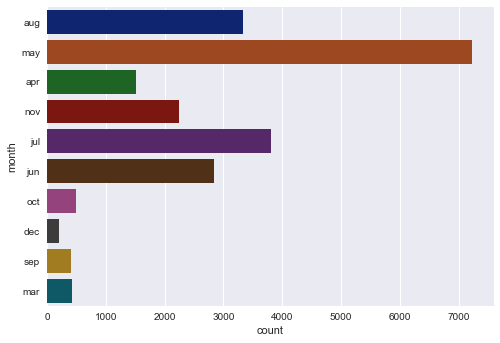

day_of_week
-----------


,day_of_week_category,count,percentage
1,thu,4728,21.01
2,mon,4653,20.68
3,wed,4458,19.81
4,tue,4414,19.62
5,fri,4247,18.88


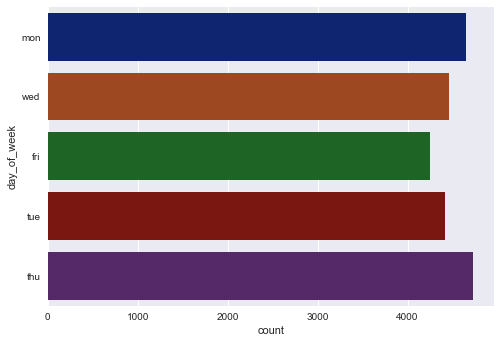

poutcome
--------


,poutcome_category,count,percentage
1,nonexistent,14618,64.97
2,failure,4442,19.74
3,success,3440,15.29


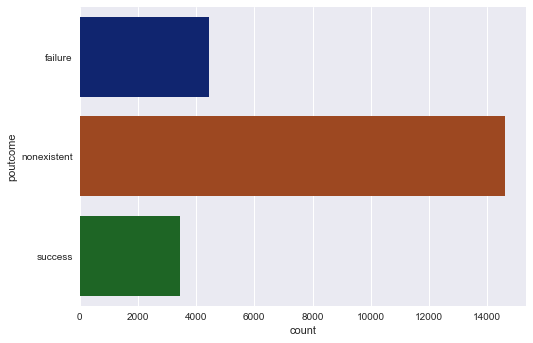

subscribe
---------


,subscribe_category,count,percentage
1,no,19548,86.88
2,yes,2952,13.12


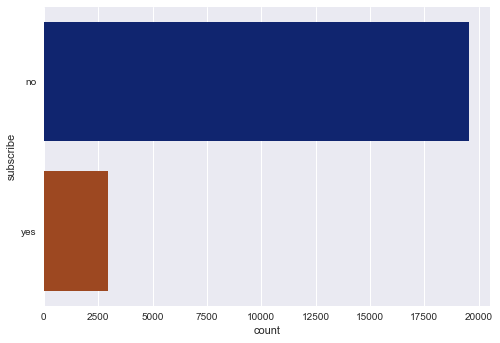

In [16]:
for i in df.select_dtypes('O').columns.to_list():
    compare_categories_in_column(df, i)

In [21]:
def convert_object_to_int(df):
    for i in df.select_dtypes('O').columns.to_list():
        categories = df[i].unique()
        contain_unknown = False

        for j in categories:
            if j == 'unknown':
                contain_unknown = True

        if contain_unknown:
            index = np.argwhere(categories == 'unknown')[0][0]
            categories = np.roll(categories, -index)

        df[i].replace(categories, range(len(categories)), inplace=True)
    return df

In [22]:
convert_object_to_int(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,49,1,1,4,2,1,1,0,0,0,...,1,115,2,0,1.4,92.479703,-35.498996,0.705058,4990.198481,0
1,52,2,2,5,0,1,2,0,1,0,...,1,402,2,1,-1.8,93.439161,-39.331320,4.245479,5144.563621,1
2,46,3,1,6,2,2,2,0,2,1,...,1,999,1,0,-1.8,93.075000,-47.100000,1.445000,5099.100000,0
3,26,4,3,5,1,1,1,0,0,2,...,28,999,0,1,1.4,93.444000,-36.100000,4.967000,5228.100000,1
4,47,1,3,7,2,2,2,0,3,3,...,1,252,4,2,-3.4,94.352376,-33.073620,1.208702,5025.420036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,1,2,5,2,2,2,0,0,2,...,3,901,3,0,-2.9,92.570527,-45.491308,3.533396,5177.336146,1
22496,34,1,1,5,2,0,0,0,0,2,...,15,524,3,0,1.4,92.809945,-27.601325,4.651084,5004.892544,0
22497,27,1,2,4,2,1,2,0,1,4,...,1,757,5,2,-1.8,94.301672,-38.211994,4.092928,4994.439635,0
22498,55,10,2,5,2,1,2,1,1,3,...,5,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.000000,0


In [23]:
x = df.drop('subscribe', axis=1)
y = df.subscribe

### Balancing  the date

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
os = RandomOverSampler(random_state=42)

In [26]:
x_overSample, y_overSample = os.fit_resample(x, y)

In [27]:
def Counter(y):
    output = {}
    for i in y.value_counts().index:
        output[i] = y.value_counts()[i]
    return str(output)

In [28]:
print("Original: {}".format(Counter(y)))
print("After Over Sampling: {}".format(Counter(y_overSample)))

Original: {0: 19548, 1: 2952}
After Over Sampling: {0: 19548, 1: 19548}


In [35]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

In [56]:
# Initialize the CatBoostClassifier
model = CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.1, loss_function='Logloss')

In [57]:
# Define the number of folds
n_folds = 5

# Initialize the KFold object
kf = KFold(n_folds, shuffle=True, random_state=0)

# Initialize a list to store the accuracy scores
scores = []

# Loop over the folds
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit your model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    score = f1_score(y_test, y_pred, average='macro')
    scores.append(score)

0:	learn: 0.6027754	total: 22.7ms	remaining: 22.7s
1:	learn: 0.5123367	total: 58.4ms	remaining: 29.1s
2:	learn: 0.4558578	total: 98.6ms	remaining: 32.8s
3:	learn: 0.4173144	total: 145ms	remaining: 36s
4:	learn: 0.3830938	total: 184ms	remaining: 36.7s
5:	learn: 0.3614505	total: 221ms	remaining: 36.6s
6:	learn: 0.3437887	total: 273ms	remaining: 38.7s
7:	learn: 0.3300180	total: 312ms	remaining: 38.7s
8:	learn: 0.3143078	total: 347ms	remaining: 38.2s
9:	learn: 0.3016916	total: 383ms	remaining: 37.9s
10:	learn: 0.2897601	total: 427ms	remaining: 38.4s
11:	learn: 0.2790280	total: 475ms	remaining: 39.1s
12:	learn: 0.2745258	total: 520ms	remaining: 39.5s
13:	learn: 0.2696136	total: 560ms	remaining: 39.4s
14:	learn: 0.2636901	total: 599ms	remaining: 39.3s
15:	learn: 0.2581671	total: 640ms	remaining: 39.3s
16:	learn: 0.2541645	total: 691ms	remaining: 40s
17:	learn: 0.2515825	total: 738ms	remaining: 40.3s
18:	learn: 0.2471690	total: 778ms	remaining: 40.2s
19:	learn: 0.2440102	total: 817ms	remainin

163:	learn: 0.0974933	total: 7.3s	remaining: 37.2s
164:	learn: 0.0973171	total: 7.37s	remaining: 37.3s
165:	learn: 0.0970142	total: 7.46s	remaining: 37.5s
166:	learn: 0.0967139	total: 7.52s	remaining: 37.5s
167:	learn: 0.0961937	total: 7.58s	remaining: 37.6s
168:	learn: 0.0958232	total: 7.65s	remaining: 37.6s
169:	learn: 0.0955067	total: 7.71s	remaining: 37.7s
170:	learn: 0.0954006	total: 7.79s	remaining: 37.7s
171:	learn: 0.0947330	total: 7.85s	remaining: 37.8s
172:	learn: 0.0941865	total: 7.93s	remaining: 37.9s
173:	learn: 0.0936491	total: 8s	remaining: 38s
174:	learn: 0.0931204	total: 8.08s	remaining: 38.1s
175:	learn: 0.0926368	total: 8.14s	remaining: 38.1s
176:	learn: 0.0921894	total: 8.21s	remaining: 38.2s
177:	learn: 0.0917784	total: 8.28s	remaining: 38.2s
178:	learn: 0.0913963	total: 8.36s	remaining: 38.3s
179:	learn: 0.0911884	total: 8.43s	remaining: 38.4s
180:	learn: 0.0906354	total: 8.51s	remaining: 38.5s
181:	learn: 0.0899917	total: 8.59s	remaining: 38.6s
182:	learn: 0.0894

325:	learn: 0.0527231	total: 18.9s	remaining: 39.1s
326:	learn: 0.0524336	total: 19s	remaining: 39s
327:	learn: 0.0522198	total: 19s	remaining: 39s
328:	learn: 0.0520980	total: 19.1s	remaining: 38.9s
329:	learn: 0.0519862	total: 19.2s	remaining: 38.9s
330:	learn: 0.0519202	total: 19.3s	remaining: 38.9s
331:	learn: 0.0518769	total: 19.3s	remaining: 38.9s
332:	learn: 0.0516349	total: 19.4s	remaining: 38.9s
333:	learn: 0.0515880	total: 19.5s	remaining: 38.8s
334:	learn: 0.0513780	total: 19.6s	remaining: 38.8s
335:	learn: 0.0512618	total: 19.6s	remaining: 38.8s
336:	learn: 0.0511585	total: 19.7s	remaining: 38.8s
337:	learn: 0.0511249	total: 19.8s	remaining: 38.7s
338:	learn: 0.0509691	total: 19.9s	remaining: 38.7s
339:	learn: 0.0507153	total: 19.9s	remaining: 38.7s
340:	learn: 0.0505622	total: 20s	remaining: 38.6s
341:	learn: 0.0502902	total: 20.1s	remaining: 38.6s
342:	learn: 0.0500350	total: 20.2s	remaining: 38.6s
343:	learn: 0.0496892	total: 20.2s	remaining: 38.6s
344:	learn: 0.0494689	

485:	learn: 0.0318139	total: 32.7s	remaining: 34.5s
486:	learn: 0.0317073	total: 32.8s	remaining: 34.5s
487:	learn: 0.0315719	total: 32.9s	remaining: 34.5s
488:	learn: 0.0314873	total: 32.9s	remaining: 34.4s
489:	learn: 0.0313758	total: 33s	remaining: 34.4s
490:	learn: 0.0312888	total: 33.1s	remaining: 34.3s
491:	learn: 0.0311874	total: 33.2s	remaining: 34.3s
492:	learn: 0.0310691	total: 33.3s	remaining: 34.2s
493:	learn: 0.0310223	total: 33.4s	remaining: 34.2s
494:	learn: 0.0309548	total: 33.5s	remaining: 34.1s
495:	learn: 0.0306676	total: 33.5s	remaining: 34.1s
496:	learn: 0.0305772	total: 33.6s	remaining: 34s
497:	learn: 0.0304969	total: 33.7s	remaining: 34s
498:	learn: 0.0304259	total: 33.8s	remaining: 33.9s
499:	learn: 0.0303753	total: 33.9s	remaining: 33.9s
500:	learn: 0.0302537	total: 34s	remaining: 33.8s
501:	learn: 0.0301850	total: 34.1s	remaining: 33.8s
502:	learn: 0.0300485	total: 34.1s	remaining: 33.7s
503:	learn: 0.0299802	total: 34.2s	remaining: 33.7s
504:	learn: 0.029872

646:	learn: 0.0204131	total: 43.7s	remaining: 23.8s
647:	learn: 0.0203861	total: 43.7s	remaining: 23.8s
648:	learn: 0.0203356	total: 43.8s	remaining: 23.7s
649:	learn: 0.0202817	total: 43.9s	remaining: 23.6s
650:	learn: 0.0202402	total: 43.9s	remaining: 23.6s
651:	learn: 0.0201830	total: 44s	remaining: 23.5s
652:	learn: 0.0201630	total: 44.1s	remaining: 23.4s
653:	learn: 0.0201175	total: 44.1s	remaining: 23.3s
654:	learn: 0.0200182	total: 44.2s	remaining: 23.3s
655:	learn: 0.0199783	total: 44.3s	remaining: 23.2s
656:	learn: 0.0199261	total: 44.3s	remaining: 23.1s
657:	learn: 0.0198733	total: 44.4s	remaining: 23.1s
658:	learn: 0.0198433	total: 44.5s	remaining: 23s
659:	learn: 0.0198222	total: 44.5s	remaining: 22.9s
660:	learn: 0.0197676	total: 44.6s	remaining: 22.9s
661:	learn: 0.0197002	total: 44.7s	remaining: 22.8s
662:	learn: 0.0196427	total: 44.7s	remaining: 22.7s
663:	learn: 0.0195572	total: 44.8s	remaining: 22.7s
664:	learn: 0.0195328	total: 44.8s	remaining: 22.6s
665:	learn: 0.01

805:	learn: 0.0140696	total: 55s	remaining: 13.2s
806:	learn: 0.0140284	total: 55.1s	remaining: 13.2s
807:	learn: 0.0139727	total: 55.2s	remaining: 13.1s
808:	learn: 0.0139404	total: 55.3s	remaining: 13.1s
809:	learn: 0.0138992	total: 55.4s	remaining: 13s
810:	learn: 0.0138517	total: 55.4s	remaining: 12.9s
811:	learn: 0.0138277	total: 55.5s	remaining: 12.8s
812:	learn: 0.0138014	total: 55.6s	remaining: 12.8s
813:	learn: 0.0137762	total: 55.7s	remaining: 12.7s
814:	learn: 0.0137509	total: 55.7s	remaining: 12.7s
815:	learn: 0.0137219	total: 55.8s	remaining: 12.6s
816:	learn: 0.0136782	total: 55.9s	remaining: 12.5s
817:	learn: 0.0136455	total: 56s	remaining: 12.5s
818:	learn: 0.0136262	total: 56s	remaining: 12.4s
819:	learn: 0.0136126	total: 56.1s	remaining: 12.3s
820:	learn: 0.0136036	total: 56.2s	remaining: 12.3s
821:	learn: 0.0135816	total: 56.3s	remaining: 12.2s
822:	learn: 0.0135703	total: 56.3s	remaining: 12.1s
823:	learn: 0.0135222	total: 56.4s	remaining: 12.1s
824:	learn: 0.013469

964:	learn: 0.0105096	total: 1m 7s	remaining: 2.43s
965:	learn: 0.0104896	total: 1m 7s	remaining: 2.36s
966:	learn: 0.0104784	total: 1m 7s	remaining: 2.29s
967:	learn: 0.0104628	total: 1m 7s	remaining: 2.22s
968:	learn: 0.0104530	total: 1m 7s	remaining: 2.15s
969:	learn: 0.0104427	total: 1m 7s	remaining: 2.08s
970:	learn: 0.0104113	total: 1m 7s	remaining: 2.02s
971:	learn: 0.0103914	total: 1m 7s	remaining: 1.95s
972:	learn: 0.0103848	total: 1m 7s	remaining: 1.88s
973:	learn: 0.0103650	total: 1m 7s	remaining: 1.81s
974:	learn: 0.0103436	total: 1m 7s	remaining: 1.74s
975:	learn: 0.0103335	total: 1m 7s	remaining: 1.67s
976:	learn: 0.0103149	total: 1m 7s	remaining: 1.6s
977:	learn: 0.0102888	total: 1m 8s	remaining: 1.53s
978:	learn: 0.0102679	total: 1m 8s	remaining: 1.46s
979:	learn: 0.0102550	total: 1m 8s	remaining: 1.39s
980:	learn: 0.0102348	total: 1m 8s	remaining: 1.32s
981:	learn: 0.0102223	total: 1m 8s	remaining: 1.25s
982:	learn: 0.0102082	total: 1m 8s	remaining: 1.18s
983:	learn: 0

126:	learn: 0.1170599	total: 9.59s	remaining: 1m 5s
127:	learn: 0.1162727	total: 9.67s	remaining: 1m 5s
128:	learn: 0.1153829	total: 9.75s	remaining: 1m 5s
129:	learn: 0.1148159	total: 9.82s	remaining: 1m 5s
130:	learn: 0.1139589	total: 9.89s	remaining: 1m 5s
131:	learn: 0.1134548	total: 9.97s	remaining: 1m 5s
132:	learn: 0.1130858	total: 10s	remaining: 1m 5s
133:	learn: 0.1128766	total: 10.1s	remaining: 1m 5s
134:	learn: 0.1125767	total: 10.2s	remaining: 1m 5s
135:	learn: 0.1120654	total: 10.3s	remaining: 1m 5s
136:	learn: 0.1117999	total: 10.3s	remaining: 1m 5s
137:	learn: 0.1115946	total: 10.4s	remaining: 1m 5s
138:	learn: 0.1112920	total: 10.5s	remaining: 1m 4s
139:	learn: 0.1103430	total: 10.6s	remaining: 1m 5s
140:	learn: 0.1101612	total: 10.7s	remaining: 1m 4s
141:	learn: 0.1094949	total: 10.8s	remaining: 1m 4s
142:	learn: 0.1090949	total: 10.8s	remaining: 1m 4s
143:	learn: 0.1082137	total: 10.9s	remaining: 1m 4s
144:	learn: 0.1078650	total: 11s	remaining: 1m 4s
145:	learn: 0.10

288:	learn: 0.0602864	total: 21.9s	remaining: 53.8s
289:	learn: 0.0601776	total: 22s	remaining: 53.7s
290:	learn: 0.0599606	total: 22s	remaining: 53.7s
291:	learn: 0.0596702	total: 22.1s	remaining: 53.6s
292:	learn: 0.0595615	total: 22.2s	remaining: 53.5s
293:	learn: 0.0592031	total: 22.3s	remaining: 53.4s
294:	learn: 0.0590040	total: 22.3s	remaining: 53.4s
295:	learn: 0.0588235	total: 22.4s	remaining: 53.3s
296:	learn: 0.0587344	total: 22.5s	remaining: 53.2s
297:	learn: 0.0584623	total: 22.5s	remaining: 53.1s
298:	learn: 0.0583134	total: 22.6s	remaining: 53s
299:	learn: 0.0580254	total: 22.7s	remaining: 53s
300:	learn: 0.0579105	total: 22.8s	remaining: 52.9s
301:	learn: 0.0577796	total: 22.9s	remaining: 52.8s
302:	learn: 0.0576660	total: 22.9s	remaining: 52.8s
303:	learn: 0.0575008	total: 23s	remaining: 52.7s
304:	learn: 0.0571172	total: 23.1s	remaining: 52.6s
305:	learn: 0.0569680	total: 23.2s	remaining: 52.6s
306:	learn: 0.0568199	total: 23.2s	remaining: 52.5s
307:	learn: 0.0566004	

448:	learn: 0.0359724	total: 33.7s	remaining: 41.4s
449:	learn: 0.0359232	total: 33.8s	remaining: 41.3s
450:	learn: 0.0357737	total: 33.9s	remaining: 41.2s
451:	learn: 0.0357215	total: 34s	remaining: 41.2s
452:	learn: 0.0356037	total: 34s	remaining: 41.1s
453:	learn: 0.0355456	total: 34.1s	remaining: 41s
454:	learn: 0.0354725	total: 34.2s	remaining: 41s
455:	learn: 0.0352328	total: 34.3s	remaining: 40.9s
456:	learn: 0.0351214	total: 34.3s	remaining: 40.8s
457:	learn: 0.0350633	total: 34.4s	remaining: 40.7s
458:	learn: 0.0349474	total: 34.5s	remaining: 40.6s
459:	learn: 0.0347933	total: 34.6s	remaining: 40.6s
460:	learn: 0.0346702	total: 34.6s	remaining: 40.5s
461:	learn: 0.0346047	total: 34.7s	remaining: 40.4s
462:	learn: 0.0344654	total: 34.8s	remaining: 40.3s
463:	learn: 0.0343537	total: 34.9s	remaining: 40.3s
464:	learn: 0.0342519	total: 34.9s	remaining: 40.2s
465:	learn: 0.0341841	total: 35s	remaining: 40.1s
466:	learn: 0.0340537	total: 35.1s	remaining: 40s
467:	learn: 0.0339756	to

609:	learn: 0.0228688	total: 45.5s	remaining: 29.1s
610:	learn: 0.0228216	total: 45.6s	remaining: 29s
611:	learn: 0.0227292	total: 45.7s	remaining: 29s
612:	learn: 0.0226747	total: 45.7s	remaining: 28.9s
613:	learn: 0.0226082	total: 45.8s	remaining: 28.8s
614:	learn: 0.0225684	total: 45.9s	remaining: 28.7s
615:	learn: 0.0224992	total: 46s	remaining: 28.6s
616:	learn: 0.0224668	total: 46s	remaining: 28.6s
617:	learn: 0.0224082	total: 46.1s	remaining: 28.5s
618:	learn: 0.0223785	total: 46.2s	remaining: 28.4s
619:	learn: 0.0223591	total: 46.3s	remaining: 28.4s
620:	learn: 0.0222885	total: 46.3s	remaining: 28.3s
621:	learn: 0.0222652	total: 46.4s	remaining: 28.2s
622:	learn: 0.0222173	total: 46.5s	remaining: 28.1s
623:	learn: 0.0221326	total: 46.6s	remaining: 28.1s
624:	learn: 0.0220584	total: 46.6s	remaining: 28s
625:	learn: 0.0219902	total: 46.7s	remaining: 27.9s
626:	learn: 0.0219628	total: 46.8s	remaining: 27.8s
627:	learn: 0.0219253	total: 46.8s	remaining: 27.7s
628:	learn: 0.0218020	

770:	learn: 0.0163117	total: 57.5s	remaining: 17.1s
771:	learn: 0.0162826	total: 57.5s	remaining: 17s
772:	learn: 0.0162646	total: 57.6s	remaining: 16.9s
773:	learn: 0.0162150	total: 57.7s	remaining: 16.8s
774:	learn: 0.0161850	total: 57.8s	remaining: 16.8s
775:	learn: 0.0161530	total: 57.8s	remaining: 16.7s
776:	learn: 0.0161249	total: 57.9s	remaining: 16.6s
777:	learn: 0.0160880	total: 58s	remaining: 16.5s
778:	learn: 0.0160553	total: 58.1s	remaining: 16.5s
779:	learn: 0.0160368	total: 58.1s	remaining: 16.4s
780:	learn: 0.0160008	total: 58.2s	remaining: 16.3s
781:	learn: 0.0159460	total: 58.3s	remaining: 16.2s
782:	learn: 0.0159277	total: 58.4s	remaining: 16.2s
783:	learn: 0.0158911	total: 58.4s	remaining: 16.1s
784:	learn: 0.0158512	total: 58.5s	remaining: 16s
785:	learn: 0.0158396	total: 58.6s	remaining: 16s
786:	learn: 0.0158203	total: 58.7s	remaining: 15.9s
787:	learn: 0.0157865	total: 58.7s	remaining: 15.8s
788:	learn: 0.0157456	total: 58.8s	remaining: 15.7s
789:	learn: 0.015715

931:	learn: 0.0119362	total: 1m 9s	remaining: 5.07s
932:	learn: 0.0119117	total: 1m 9s	remaining: 5s
933:	learn: 0.0119049	total: 1m 9s	remaining: 4.92s
934:	learn: 0.0118821	total: 1m 9s	remaining: 4.85s
935:	learn: 0.0118593	total: 1m 9s	remaining: 4.77s
936:	learn: 0.0118511	total: 1m 9s	remaining: 4.7s
937:	learn: 0.0118112	total: 1m 9s	remaining: 4.62s
938:	learn: 0.0117983	total: 1m 10s	remaining: 4.55s
939:	learn: 0.0117877	total: 1m 10s	remaining: 4.47s
940:	learn: 0.0117663	total: 1m 10s	remaining: 4.4s
941:	learn: 0.0117592	total: 1m 10s	remaining: 4.33s
942:	learn: 0.0117349	total: 1m 10s	remaining: 4.25s
943:	learn: 0.0117187	total: 1m 10s	remaining: 4.18s
944:	learn: 0.0116898	total: 1m 10s	remaining: 4.1s
945:	learn: 0.0116721	total: 1m 10s	remaining: 4.03s
946:	learn: 0.0116501	total: 1m 10s	remaining: 3.95s
947:	learn: 0.0116267	total: 1m 10s	remaining: 3.88s
948:	learn: 0.0115963	total: 1m 10s	remaining: 3.8s
949:	learn: 0.0115744	total: 1m 10s	remaining: 3.73s
950:	le

91:	learn: 0.1453649	total: 6.69s	remaining: 1m 6s
92:	learn: 0.1446822	total: 6.75s	remaining: 1m 5s
93:	learn: 0.1438039	total: 6.82s	remaining: 1m 5s
94:	learn: 0.1431576	total: 6.89s	remaining: 1m 5s
95:	learn: 0.1425619	total: 6.97s	remaining: 1m 5s
96:	learn: 0.1411795	total: 7.04s	remaining: 1m 5s
97:	learn: 0.1394118	total: 7.13s	remaining: 1m 5s
98:	learn: 0.1385193	total: 7.22s	remaining: 1m 5s
99:	learn: 0.1372554	total: 7.31s	remaining: 1m 5s
100:	learn: 0.1369018	total: 7.38s	remaining: 1m 5s
101:	learn: 0.1363398	total: 7.47s	remaining: 1m 5s
102:	learn: 0.1356164	total: 7.55s	remaining: 1m 5s
103:	learn: 0.1349603	total: 7.63s	remaining: 1m 5s
104:	learn: 0.1344914	total: 7.71s	remaining: 1m 5s
105:	learn: 0.1334492	total: 7.79s	remaining: 1m 5s
106:	learn: 0.1325984	total: 7.87s	remaining: 1m 5s
107:	learn: 0.1318475	total: 7.95s	remaining: 1m 5s
108:	learn: 0.1308678	total: 8.03s	remaining: 1m 5s
109:	learn: 0.1302865	total: 8.11s	remaining: 1m 5s
110:	learn: 0.1295794

251:	learn: 0.0668639	total: 18.9s	remaining: 56.2s
252:	learn: 0.0664218	total: 19s	remaining: 56.1s
253:	learn: 0.0661636	total: 19.1s	remaining: 56s
254:	learn: 0.0659111	total: 19.1s	remaining: 55.9s
255:	learn: 0.0656907	total: 19.2s	remaining: 55.9s
256:	learn: 0.0653640	total: 19.3s	remaining: 55.8s
257:	learn: 0.0651487	total: 19.4s	remaining: 55.7s
258:	learn: 0.0649147	total: 19.4s	remaining: 55.6s
259:	learn: 0.0644893	total: 19.5s	remaining: 55.5s
260:	learn: 0.0642491	total: 19.6s	remaining: 55.5s
261:	learn: 0.0640895	total: 19.7s	remaining: 55.4s
262:	learn: 0.0637380	total: 19.7s	remaining: 55.3s
263:	learn: 0.0632543	total: 19.8s	remaining: 55.2s
264:	learn: 0.0630212	total: 19.9s	remaining: 55.2s
265:	learn: 0.0627243	total: 20s	remaining: 55.1s
266:	learn: 0.0625859	total: 20s	remaining: 55s
267:	learn: 0.0622478	total: 20.1s	remaining: 55s
268:	learn: 0.0620443	total: 20.2s	remaining: 54.9s
269:	learn: 0.0618720	total: 20.3s	remaining: 54.8s
270:	learn: 0.0617040	to

410:	learn: 0.0382716	total: 30.7s	remaining: 43.9s
411:	learn: 0.0382054	total: 30.7s	remaining: 43.9s
412:	learn: 0.0381608	total: 30.8s	remaining: 43.8s
413:	learn: 0.0380452	total: 30.9s	remaining: 43.7s
414:	learn: 0.0378159	total: 30.9s	remaining: 43.6s
415:	learn: 0.0374796	total: 31s	remaining: 43.6s
416:	learn: 0.0373366	total: 31.1s	remaining: 43.5s
417:	learn: 0.0372227	total: 31.2s	remaining: 43.4s
418:	learn: 0.0370876	total: 31.3s	remaining: 43.3s
419:	learn: 0.0369988	total: 31.3s	remaining: 43.3s
420:	learn: 0.0368920	total: 31.4s	remaining: 43.2s
421:	learn: 0.0367511	total: 31.5s	remaining: 43.1s
422:	learn: 0.0365841	total: 31.5s	remaining: 43s
423:	learn: 0.0364001	total: 31.6s	remaining: 42.9s
424:	learn: 0.0362862	total: 31.7s	remaining: 42.9s
425:	learn: 0.0362033	total: 31.8s	remaining: 42.8s
426:	learn: 0.0360008	total: 31.8s	remaining: 42.7s
427:	learn: 0.0359210	total: 31.9s	remaining: 42.7s
428:	learn: 0.0357571	total: 32s	remaining: 42.6s
429:	learn: 0.0356

571:	learn: 0.0234648	total: 42.8s	remaining: 32s
572:	learn: 0.0234073	total: 42.8s	remaining: 31.9s
573:	learn: 0.0233355	total: 42.9s	remaining: 31.8s
574:	learn: 0.0232824	total: 43s	remaining: 31.8s
575:	learn: 0.0232132	total: 43s	remaining: 31.7s
576:	learn: 0.0231203	total: 43.1s	remaining: 31.6s
577:	learn: 0.0230455	total: 43.2s	remaining: 31.5s
578:	learn: 0.0229707	total: 43.3s	remaining: 31.5s
579:	learn: 0.0229259	total: 43.4s	remaining: 31.4s
580:	learn: 0.0228918	total: 43.4s	remaining: 31.3s
581:	learn: 0.0228516	total: 43.5s	remaining: 31.3s
582:	learn: 0.0228136	total: 43.6s	remaining: 31.2s
583:	learn: 0.0226984	total: 43.7s	remaining: 31.1s
584:	learn: 0.0226778	total: 43.8s	remaining: 31.1s
585:	learn: 0.0226469	total: 43.9s	remaining: 31s
586:	learn: 0.0226067	total: 43.9s	remaining: 30.9s
587:	learn: 0.0225557	total: 44s	remaining: 30.8s
588:	learn: 0.0224891	total: 44.1s	remaining: 30.8s
589:	learn: 0.0224694	total: 44.2s	remaining: 30.7s
590:	learn: 0.0224297	

733:	learn: 0.0159621	total: 54.9s	remaining: 19.9s
734:	learn: 0.0159106	total: 55s	remaining: 19.8s
735:	learn: 0.0158593	total: 55s	remaining: 19.7s
736:	learn: 0.0158495	total: 55.1s	remaining: 19.7s
737:	learn: 0.0158211	total: 55.2s	remaining: 19.6s
738:	learn: 0.0157786	total: 55.3s	remaining: 19.5s
739:	learn: 0.0157416	total: 55.3s	remaining: 19.4s
740:	learn: 0.0156970	total: 55.4s	remaining: 19.4s
741:	learn: 0.0156785	total: 55.5s	remaining: 19.3s
742:	learn: 0.0156295	total: 55.6s	remaining: 19.2s
743:	learn: 0.0155822	total: 55.6s	remaining: 19.1s
744:	learn: 0.0155524	total: 55.7s	remaining: 19.1s
745:	learn: 0.0155194	total: 55.8s	remaining: 19s
746:	learn: 0.0154964	total: 55.9s	remaining: 18.9s
747:	learn: 0.0154646	total: 55.9s	remaining: 18.8s
748:	learn: 0.0154458	total: 56s	remaining: 18.8s
749:	learn: 0.0154129	total: 56.1s	remaining: 18.7s
750:	learn: 0.0153824	total: 56.2s	remaining: 18.6s
751:	learn: 0.0153244	total: 56.2s	remaining: 18.5s
752:	learn: 0.015288

894:	learn: 0.0115730	total: 1m 6s	remaining: 7.84s
895:	learn: 0.0115580	total: 1m 6s	remaining: 7.76s
896:	learn: 0.0115250	total: 1m 6s	remaining: 7.69s
897:	learn: 0.0115214	total: 1m 7s	remaining: 7.62s
898:	learn: 0.0115116	total: 1m 7s	remaining: 7.54s
899:	learn: 0.0115055	total: 1m 7s	remaining: 7.46s
900:	learn: 0.0114948	total: 1m 7s	remaining: 7.39s
901:	learn: 0.0114680	total: 1m 7s	remaining: 7.31s
902:	learn: 0.0114599	total: 1m 7s	remaining: 7.24s
903:	learn: 0.0114356	total: 1m 7s	remaining: 7.17s
904:	learn: 0.0114123	total: 1m 7s	remaining: 7.09s
905:	learn: 0.0113864	total: 1m 7s	remaining: 7.02s
906:	learn: 0.0113611	total: 1m 7s	remaining: 6.94s
907:	learn: 0.0113386	total: 1m 7s	remaining: 6.87s
908:	learn: 0.0113162	total: 1m 7s	remaining: 6.79s
909:	learn: 0.0112905	total: 1m 7s	remaining: 6.72s
910:	learn: 0.0112616	total: 1m 7s	remaining: 6.64s
911:	learn: 0.0112367	total: 1m 8s	remaining: 6.57s
912:	learn: 0.0112223	total: 1m 8s	remaining: 6.49s
913:	learn: 

53:	learn: 0.1849072	total: 4.16s	remaining: 1m 12s
54:	learn: 0.1830219	total: 4.24s	remaining: 1m 12s
55:	learn: 0.1819693	total: 4.31s	remaining: 1m 12s
56:	learn: 0.1810513	total: 4.39s	remaining: 1m 12s
57:	learn: 0.1795579	total: 4.46s	remaining: 1m 12s
58:	learn: 0.1785195	total: 4.54s	remaining: 1m 12s
59:	learn: 0.1778220	total: 4.61s	remaining: 1m 12s
60:	learn: 0.1760655	total: 4.69s	remaining: 1m 12s
61:	learn: 0.1752946	total: 4.76s	remaining: 1m 12s
62:	learn: 0.1740987	total: 4.84s	remaining: 1m 12s
63:	learn: 0.1727521	total: 4.92s	remaining: 1m 11s
64:	learn: 0.1720925	total: 5s	remaining: 1m 11s
65:	learn: 0.1708475	total: 5.08s	remaining: 1m 11s
66:	learn: 0.1694601	total: 5.16s	remaining: 1m 11s
67:	learn: 0.1676302	total: 5.24s	remaining: 1m 11s
68:	learn: 0.1666611	total: 5.32s	remaining: 1m 11s
69:	learn: 0.1659091	total: 5.39s	remaining: 1m 11s
70:	learn: 0.1649947	total: 5.47s	remaining: 1m 11s
71:	learn: 0.1639009	total: 5.56s	remaining: 1m 11s
72:	learn: 0.16

213:	learn: 0.0793589	total: 16.1s	remaining: 59.3s
214:	learn: 0.0790390	total: 16.2s	remaining: 59.2s
215:	learn: 0.0787159	total: 16.3s	remaining: 59.1s
216:	learn: 0.0784513	total: 16.4s	remaining: 59s
217:	learn: 0.0778109	total: 16.4s	remaining: 58.9s
218:	learn: 0.0774722	total: 16.5s	remaining: 58.9s
219:	learn: 0.0770476	total: 16.6s	remaining: 58.8s
220:	learn: 0.0766946	total: 16.7s	remaining: 58.7s
221:	learn: 0.0763214	total: 16.7s	remaining: 58.7s
222:	learn: 0.0760334	total: 16.8s	remaining: 58.6s
223:	learn: 0.0757117	total: 16.9s	remaining: 58.5s
224:	learn: 0.0755349	total: 17s	remaining: 58.4s
225:	learn: 0.0753180	total: 17s	remaining: 58.4s
226:	learn: 0.0750055	total: 17.1s	remaining: 58.3s
227:	learn: 0.0747621	total: 17.2s	remaining: 58.2s
228:	learn: 0.0744272	total: 17.3s	remaining: 58.1s
229:	learn: 0.0741041	total: 17.3s	remaining: 58s
230:	learn: 0.0737654	total: 17.4s	remaining: 57.9s
231:	learn: 0.0735419	total: 17.5s	remaining: 57.8s
232:	learn: 0.073073

374:	learn: 0.0444925	total: 28s	remaining: 46.6s
375:	learn: 0.0443752	total: 28s	remaining: 46.5s
376:	learn: 0.0442188	total: 28.1s	remaining: 46.5s
377:	learn: 0.0440809	total: 28.2s	remaining: 46.4s
378:	learn: 0.0439861	total: 28.3s	remaining: 46.3s
379:	learn: 0.0438530	total: 28.3s	remaining: 46.2s
380:	learn: 0.0436668	total: 28.4s	remaining: 46.1s
381:	learn: 0.0435112	total: 28.5s	remaining: 46.1s
382:	learn: 0.0434008	total: 28.5s	remaining: 46s
383:	learn: 0.0432605	total: 28.6s	remaining: 45.9s
384:	learn: 0.0431250	total: 28.7s	remaining: 45.8s
385:	learn: 0.0430168	total: 28.8s	remaining: 45.7s
386:	learn: 0.0428821	total: 28.8s	remaining: 45.7s
387:	learn: 0.0427297	total: 28.9s	remaining: 45.6s
388:	learn: 0.0426057	total: 29s	remaining: 45.5s
389:	learn: 0.0424975	total: 29s	remaining: 45.4s
390:	learn: 0.0424027	total: 29.1s	remaining: 45.4s
391:	learn: 0.0423219	total: 29.2s	remaining: 45.3s
392:	learn: 0.0421367	total: 29.3s	remaining: 45.2s
393:	learn: 0.0419490	

534:	learn: 0.0280027	total: 39.8s	remaining: 34.6s
535:	learn: 0.0279010	total: 39.9s	remaining: 34.5s
536:	learn: 0.0278274	total: 40s	remaining: 34.5s
537:	learn: 0.0277779	total: 40s	remaining: 34.4s
538:	learn: 0.0276748	total: 40.1s	remaining: 34.3s
539:	learn: 0.0276243	total: 40.2s	remaining: 34.2s
540:	learn: 0.0275356	total: 40.2s	remaining: 34.1s
541:	learn: 0.0274797	total: 40.3s	remaining: 34.1s
542:	learn: 0.0273935	total: 40.4s	remaining: 34s
543:	learn: 0.0273417	total: 40.4s	remaining: 33.9s
544:	learn: 0.0272714	total: 40.5s	remaining: 33.8s
545:	learn: 0.0272243	total: 40.6s	remaining: 33.7s
546:	learn: 0.0271296	total: 40.7s	remaining: 33.7s
547:	learn: 0.0270699	total: 40.7s	remaining: 33.6s
548:	learn: 0.0270145	total: 40.8s	remaining: 33.5s
549:	learn: 0.0269522	total: 40.9s	remaining: 33.5s
550:	learn: 0.0268064	total: 41s	remaining: 33.4s
551:	learn: 0.0267200	total: 41s	remaining: 33.3s
552:	learn: 0.0266259	total: 41.1s	remaining: 33.2s
553:	learn: 0.0265882	

693:	learn: 0.0186229	total: 52.7s	remaining: 23.3s
694:	learn: 0.0186011	total: 52.8s	remaining: 23.2s
695:	learn: 0.0185534	total: 52.9s	remaining: 23.1s
696:	learn: 0.0185184	total: 53s	remaining: 23.1s
697:	learn: 0.0184753	total: 53.2s	remaining: 23s
698:	learn: 0.0184516	total: 53.2s	remaining: 22.9s
699:	learn: 0.0183984	total: 53.3s	remaining: 22.9s
700:	learn: 0.0183563	total: 53.4s	remaining: 22.8s
701:	learn: 0.0183242	total: 53.5s	remaining: 22.7s
702:	learn: 0.0182669	total: 53.6s	remaining: 22.6s
703:	learn: 0.0182313	total: 53.7s	remaining: 22.6s
704:	learn: 0.0181916	total: 53.8s	remaining: 22.5s
705:	learn: 0.0181609	total: 53.9s	remaining: 22.4s
706:	learn: 0.0181209	total: 54s	remaining: 22.4s
707:	learn: 0.0180870	total: 54s	remaining: 22.3s
708:	learn: 0.0180439	total: 54.1s	remaining: 22.2s
709:	learn: 0.0180153	total: 54.2s	remaining: 22.1s
710:	learn: 0.0179470	total: 54.3s	remaining: 22.1s
711:	learn: 0.0179246	total: 54.4s	remaining: 22s
712:	learn: 0.0178770	

853:	learn: 0.0133098	total: 1m 3s	remaining: 10.9s
854:	learn: 0.0132933	total: 1m 3s	remaining: 10.8s
855:	learn: 0.0132705	total: 1m 3s	remaining: 10.8s
856:	learn: 0.0132320	total: 1m 4s	remaining: 10.7s
857:	learn: 0.0132109	total: 1m 4s	remaining: 10.6s
858:	learn: 0.0131918	total: 1m 4s	remaining: 10.5s
859:	learn: 0.0131720	total: 1m 4s	remaining: 10.5s
860:	learn: 0.0131613	total: 1m 4s	remaining: 10.4s
861:	learn: 0.0131319	total: 1m 4s	remaining: 10.3s
862:	learn: 0.0130994	total: 1m 4s	remaining: 10.2s
863:	learn: 0.0130751	total: 1m 4s	remaining: 10.1s
864:	learn: 0.0130576	total: 1m 4s	remaining: 10.1s
865:	learn: 0.0130270	total: 1m 4s	remaining: 9.99s
866:	learn: 0.0129918	total: 1m 4s	remaining: 9.92s
867:	learn: 0.0129759	total: 1m 4s	remaining: 9.85s
868:	learn: 0.0129592	total: 1m 4s	remaining: 9.78s
869:	learn: 0.0129392	total: 1m 4s	remaining: 9.7s
870:	learn: 0.0129231	total: 1m 4s	remaining: 9.62s
871:	learn: 0.0129039	total: 1m 5s	remaining: 9.55s
872:	learn: 0

11:	learn: 0.2819002	total: 1.13s	remaining: 1m 33s
12:	learn: 0.2740657	total: 1.22s	remaining: 1m 32s
13:	learn: 0.2690955	total: 1.3s	remaining: 1m 31s
14:	learn: 0.2622798	total: 1.39s	remaining: 1m 31s
15:	learn: 0.2578739	total: 1.47s	remaining: 1m 30s
16:	learn: 0.2551346	total: 1.54s	remaining: 1m 29s
17:	learn: 0.2507332	total: 1.63s	remaining: 1m 28s
18:	learn: 0.2462392	total: 1.72s	remaining: 1m 28s
19:	learn: 0.2431211	total: 1.8s	remaining: 1m 28s
20:	learn: 0.2402201	total: 1.88s	remaining: 1m 27s
21:	learn: 0.2376262	total: 1.97s	remaining: 1m 27s
22:	learn: 0.2340304	total: 2.05s	remaining: 1m 27s
23:	learn: 0.2312536	total: 2.14s	remaining: 1m 26s
24:	learn: 0.2294851	total: 2.23s	remaining: 1m 27s
25:	learn: 0.2274013	total: 2.34s	remaining: 1m 27s
26:	learn: 0.2250584	total: 2.43s	remaining: 1m 27s
27:	learn: 0.2227137	total: 2.51s	remaining: 1m 27s
28:	learn: 0.2211265	total: 2.6s	remaining: 1m 27s
29:	learn: 0.2189235	total: 2.66s	remaining: 1m 25s
30:	learn: 0.21

170:	learn: 0.0955245	total: 14s	remaining: 1m 7s
171:	learn: 0.0947701	total: 14.1s	remaining: 1m 7s
172:	learn: 0.0944714	total: 14.2s	remaining: 1m 7s
173:	learn: 0.0939593	total: 14.3s	remaining: 1m 7s
174:	learn: 0.0934808	total: 14.4s	remaining: 1m 7s
175:	learn: 0.0932873	total: 14.5s	remaining: 1m 7s
176:	learn: 0.0929215	total: 14.6s	remaining: 1m 7s
177:	learn: 0.0926122	total: 14.7s	remaining: 1m 7s
178:	learn: 0.0923394	total: 14.8s	remaining: 1m 7s
179:	learn: 0.0920513	total: 14.8s	remaining: 1m 7s
180:	learn: 0.0916972	total: 15s	remaining: 1m 7s
181:	learn: 0.0915104	total: 15.1s	remaining: 1m 7s
182:	learn: 0.0911071	total: 15.2s	remaining: 1m 7s
183:	learn: 0.0908397	total: 15.3s	remaining: 1m 7s
184:	learn: 0.0902837	total: 15.4s	remaining: 1m 7s
185:	learn: 0.0898313	total: 15.4s	remaining: 1m 7s
186:	learn: 0.0895366	total: 15.5s	remaining: 1m 7s
187:	learn: 0.0891448	total: 15.6s	remaining: 1m 7s
188:	learn: 0.0888467	total: 15.7s	remaining: 1m 7s
189:	learn: 0.08

329:	learn: 0.0511708	total: 26.9s	remaining: 54.6s
330:	learn: 0.0509927	total: 27s	remaining: 54.5s
331:	learn: 0.0507033	total: 27s	remaining: 54.4s
332:	learn: 0.0505605	total: 27.1s	remaining: 54.3s
333:	learn: 0.0504093	total: 27.2s	remaining: 54.2s
334:	learn: 0.0502172	total: 27.3s	remaining: 54.2s
335:	learn: 0.0498900	total: 27.4s	remaining: 54.1s
336:	learn: 0.0497205	total: 27.4s	remaining: 54s
337:	learn: 0.0496114	total: 27.5s	remaining: 53.9s
338:	learn: 0.0494230	total: 27.6s	remaining: 53.8s
339:	learn: 0.0493104	total: 27.7s	remaining: 53.7s
340:	learn: 0.0489742	total: 27.8s	remaining: 53.7s
341:	learn: 0.0488462	total: 27.9s	remaining: 53.6s
342:	learn: 0.0487441	total: 27.9s	remaining: 53.5s
343:	learn: 0.0485566	total: 28s	remaining: 53.4s
344:	learn: 0.0483950	total: 28.1s	remaining: 53.3s
345:	learn: 0.0482880	total: 28.2s	remaining: 53.2s
346:	learn: 0.0481502	total: 28.2s	remaining: 53.1s
347:	learn: 0.0479795	total: 28.3s	remaining: 53.1s
348:	learn: 0.047842

490:	learn: 0.0304584	total: 39.3s	remaining: 40.7s
491:	learn: 0.0303718	total: 39.3s	remaining: 40.6s
492:	learn: 0.0302790	total: 39.4s	remaining: 40.5s
493:	learn: 0.0301862	total: 39.5s	remaining: 40.5s
494:	learn: 0.0300955	total: 39.6s	remaining: 40.4s
495:	learn: 0.0299954	total: 39.6s	remaining: 40.3s
496:	learn: 0.0299168	total: 39.7s	remaining: 40.2s
497:	learn: 0.0298856	total: 39.8s	remaining: 40.1s
498:	learn: 0.0298258	total: 39.9s	remaining: 40s
499:	learn: 0.0297550	total: 40s	remaining: 40s
500:	learn: 0.0296444	total: 40s	remaining: 39.9s
501:	learn: 0.0295689	total: 40.1s	remaining: 39.8s
502:	learn: 0.0294990	total: 40.2s	remaining: 39.7s
503:	learn: 0.0294214	total: 40.3s	remaining: 39.7s
504:	learn: 0.0293558	total: 40.4s	remaining: 39.6s
505:	learn: 0.0292748	total: 40.5s	remaining: 39.5s
506:	learn: 0.0291947	total: 40.5s	remaining: 39.4s
507:	learn: 0.0291190	total: 40.6s	remaining: 39.4s
508:	learn: 0.0290740	total: 40.7s	remaining: 39.3s
509:	learn: 0.029000

651:	learn: 0.0200195	total: 52s	remaining: 27.8s
652:	learn: 0.0199808	total: 52.1s	remaining: 27.7s
653:	learn: 0.0199448	total: 52.2s	remaining: 27.6s
654:	learn: 0.0199038	total: 52.3s	remaining: 27.5s
655:	learn: 0.0198338	total: 52.4s	remaining: 27.5s
656:	learn: 0.0197879	total: 52.4s	remaining: 27.4s
657:	learn: 0.0197627	total: 52.5s	remaining: 27.3s
658:	learn: 0.0196919	total: 52.6s	remaining: 27.2s
659:	learn: 0.0196629	total: 52.7s	remaining: 27.1s
660:	learn: 0.0196116	total: 52.8s	remaining: 27.1s
661:	learn: 0.0195577	total: 52.9s	remaining: 27s
662:	learn: 0.0195176	total: 53s	remaining: 26.9s
663:	learn: 0.0194677	total: 53.1s	remaining: 26.8s
664:	learn: 0.0194021	total: 53.1s	remaining: 26.8s
665:	learn: 0.0193264	total: 53.2s	remaining: 26.7s
666:	learn: 0.0192879	total: 53.3s	remaining: 26.6s
667:	learn: 0.0192354	total: 53.4s	remaining: 26.5s
668:	learn: 0.0192088	total: 53.5s	remaining: 26.5s
669:	learn: 0.0191686	total: 53.6s	remaining: 26.4s
670:	learn: 0.0191

813:	learn: 0.0138528	total: 1m 5s	remaining: 14.9s
814:	learn: 0.0138453	total: 1m 5s	remaining: 14.8s
815:	learn: 0.0138353	total: 1m 5s	remaining: 14.7s
816:	learn: 0.0138098	total: 1m 5s	remaining: 14.6s
817:	learn: 0.0137777	total: 1m 5s	remaining: 14.5s
818:	learn: 0.0137483	total: 1m 5s	remaining: 14.4s
819:	learn: 0.0137233	total: 1m 5s	remaining: 14.4s
820:	learn: 0.0137082	total: 1m 5s	remaining: 14.3s
821:	learn: 0.0136900	total: 1m 5s	remaining: 14.2s
822:	learn: 0.0136803	total: 1m 5s	remaining: 14.1s
823:	learn: 0.0136514	total: 1m 5s	remaining: 14s
824:	learn: 0.0136354	total: 1m 5s	remaining: 14s
825:	learn: 0.0136179	total: 1m 5s	remaining: 13.9s
826:	learn: 0.0135836	total: 1m 5s	remaining: 13.8s
827:	learn: 0.0135468	total: 1m 6s	remaining: 13.7s
828:	learn: 0.0134738	total: 1m 6s	remaining: 13.6s
829:	learn: 0.0134452	total: 1m 6s	remaining: 13.6s
830:	learn: 0.0134170	total: 1m 6s	remaining: 13.5s
831:	learn: 0.0133968	total: 1m 6s	remaining: 13.4s
832:	learn: 0.01

970:	learn: 0.0102861	total: 1m 16s	remaining: 2.29s
971:	learn: 0.0102696	total: 1m 16s	remaining: 2.21s
972:	learn: 0.0102265	total: 1m 16s	remaining: 2.13s
973:	learn: 0.0102072	total: 1m 16s	remaining: 2.05s
974:	learn: 0.0102010	total: 1m 16s	remaining: 1.97s
975:	learn: 0.0101846	total: 1m 16s	remaining: 1.89s
976:	learn: 0.0101727	total: 1m 17s	remaining: 1.81s
977:	learn: 0.0101537	total: 1m 17s	remaining: 1.74s
978:	learn: 0.0101408	total: 1m 17s	remaining: 1.66s
979:	learn: 0.0101239	total: 1m 17s	remaining: 1.58s
980:	learn: 0.0101136	total: 1m 17s	remaining: 1.5s
981:	learn: 0.0100964	total: 1m 17s	remaining: 1.42s
982:	learn: 0.0100804	total: 1m 17s	remaining: 1.34s
983:	learn: 0.0100601	total: 1m 17s	remaining: 1.26s
984:	learn: 0.0100240	total: 1m 17s	remaining: 1.18s
985:	learn: 0.0099849	total: 1m 17s	remaining: 1.1s
986:	learn: 0.0099691	total: 1m 17s	remaining: 1.02s
987:	learn: 0.0099594	total: 1m 17s	remaining: 946ms
988:	learn: 0.0099491	total: 1m 17s	remaining: 8

In [58]:
# Print the mean F1 score
mean_f1_score = np.mean(scores)
print('Mean F1 Score:', mean_f1_score)

Mean F1 Score: 0.6883836914540497


### Training the full dataset

In [59]:
model.fit(x, y)

0:	learn: 0.5861979	total: 38.9ms	remaining: 38.9s
1:	learn: 0.5061964	total: 79.4ms	remaining: 39.6s
2:	learn: 0.4555668	total: 117ms	remaining: 38.7s
3:	learn: 0.4178206	total: 153ms	remaining: 38.1s
4:	learn: 0.3799912	total: 189ms	remaining: 37.6s
5:	learn: 0.3603551	total: 201ms	remaining: 33.2s
6:	learn: 0.3457175	total: 235ms	remaining: 33.4s
7:	learn: 0.3306548	total: 285ms	remaining: 35.3s
8:	learn: 0.3143694	total: 329ms	remaining: 36.2s
9:	learn: 0.3018210	total: 368ms	remaining: 36.5s
10:	learn: 0.2902752	total: 408ms	remaining: 36.7s
11:	learn: 0.2843908	total: 451ms	remaining: 37.2s
12:	learn: 0.2768988	total: 507ms	remaining: 38.5s
13:	learn: 0.2713022	total: 544ms	remaining: 38.3s
14:	learn: 0.2655786	total: 581ms	remaining: 38.1s
15:	learn: 0.2599276	total: 618ms	remaining: 38s
16:	learn: 0.2560675	total: 654ms	remaining: 37.8s
17:	learn: 0.2528633	total: 705ms	remaining: 38.5s
18:	learn: 0.2487125	total: 745ms	remaining: 38.4s
19:	learn: 0.2457955	total: 783ms	remaini

161:	learn: 0.1150129	total: 9.04s	remaining: 46.8s
162:	learn: 0.1146303	total: 9.11s	remaining: 46.8s
163:	learn: 0.1135304	total: 9.19s	remaining: 46.9s
164:	learn: 0.1132096	total: 9.27s	remaining: 46.9s
165:	learn: 0.1124546	total: 9.33s	remaining: 46.9s
166:	learn: 0.1122461	total: 9.38s	remaining: 46.8s
167:	learn: 0.1117373	total: 9.42s	remaining: 46.7s
168:	learn: 0.1112820	total: 9.46s	remaining: 46.5s
169:	learn: 0.1106156	total: 9.5s	remaining: 46.4s
170:	learn: 0.1102308	total: 9.56s	remaining: 46.3s
171:	learn: 0.1099168	total: 9.6s	remaining: 46.2s
172:	learn: 0.1096940	total: 9.63s	remaining: 46.1s
173:	learn: 0.1091127	total: 9.68s	remaining: 45.9s
174:	learn: 0.1088452	total: 9.72s	remaining: 45.8s
175:	learn: 0.1086168	total: 9.76s	remaining: 45.7s
176:	learn: 0.1083104	total: 9.81s	remaining: 45.6s
177:	learn: 0.1079497	total: 9.85s	remaining: 45.5s
178:	learn: 0.1076247	total: 9.9s	remaining: 45.4s
179:	learn: 0.1074443	total: 9.97s	remaining: 45.4s
180:	learn: 0.1

321:	learn: 0.0636927	total: 20s	remaining: 42.1s
322:	learn: 0.0636090	total: 20.1s	remaining: 42.1s
323:	learn: 0.0634251	total: 20.1s	remaining: 42s
324:	learn: 0.0632103	total: 20.2s	remaining: 42s
325:	learn: 0.0629647	total: 20.3s	remaining: 42s
326:	learn: 0.0628629	total: 20.4s	remaining: 41.9s
327:	learn: 0.0627912	total: 20.5s	remaining: 41.9s
328:	learn: 0.0625800	total: 20.6s	remaining: 42s
329:	learn: 0.0622466	total: 20.7s	remaining: 42s
330:	learn: 0.0619980	total: 20.8s	remaining: 42s
331:	learn: 0.0617266	total: 20.9s	remaining: 42s
332:	learn: 0.0616076	total: 21s	remaining: 42s
333:	learn: 0.0614583	total: 21s	remaining: 42s
334:	learn: 0.0613196	total: 21.1s	remaining: 41.9s
335:	learn: 0.0611323	total: 21.2s	remaining: 41.9s
336:	learn: 0.0609808	total: 21.3s	remaining: 41.8s
337:	learn: 0.0607373	total: 21.4s	remaining: 41.8s
338:	learn: 0.0606325	total: 21.4s	remaining: 41.8s
339:	learn: 0.0604768	total: 21.5s	remaining: 41.7s
340:	learn: 0.0601749	total: 21.6s	r

481:	learn: 0.0395566	total: 32.9s	remaining: 35.4s
482:	learn: 0.0394786	total: 33s	remaining: 35.3s
483:	learn: 0.0393673	total: 33.1s	remaining: 35.3s
484:	learn: 0.0393003	total: 33.1s	remaining: 35.2s
485:	learn: 0.0392470	total: 33.2s	remaining: 35.1s
486:	learn: 0.0391741	total: 33.3s	remaining: 35.1s
487:	learn: 0.0391056	total: 33.4s	remaining: 35s
488:	learn: 0.0389548	total: 33.5s	remaining: 35s
489:	learn: 0.0388990	total: 33.5s	remaining: 34.9s
490:	learn: 0.0387775	total: 33.6s	remaining: 34.8s
491:	learn: 0.0387145	total: 33.7s	remaining: 34.8s
492:	learn: 0.0386399	total: 33.7s	remaining: 34.7s
493:	learn: 0.0383726	total: 33.8s	remaining: 34.6s
494:	learn: 0.0382520	total: 33.9s	remaining: 34.6s
495:	learn: 0.0382111	total: 34s	remaining: 34.5s
496:	learn: 0.0380244	total: 34s	remaining: 34.5s
497:	learn: 0.0378374	total: 34.1s	remaining: 34.4s
498:	learn: 0.0377384	total: 34.2s	remaining: 34.4s
499:	learn: 0.0376204	total: 34.3s	remaining: 34.3s
500:	learn: 0.0375114	

640:	learn: 0.0266074	total: 44.8s	remaining: 25.1s
641:	learn: 0.0264955	total: 44.9s	remaining: 25.1s
642:	learn: 0.0263954	total: 45s	remaining: 25s
643:	learn: 0.0263573	total: 45.1s	remaining: 24.9s
644:	learn: 0.0262649	total: 45.2s	remaining: 24.9s
645:	learn: 0.0262270	total: 45.3s	remaining: 24.8s
646:	learn: 0.0261878	total: 45.3s	remaining: 24.7s
647:	learn: 0.0261205	total: 45.4s	remaining: 24.7s
648:	learn: 0.0260608	total: 45.5s	remaining: 24.6s
649:	learn: 0.0260354	total: 45.6s	remaining: 24.5s
650:	learn: 0.0258966	total: 45.6s	remaining: 24.5s
651:	learn: 0.0258129	total: 45.7s	remaining: 24.4s
652:	learn: 0.0257160	total: 45.8s	remaining: 24.3s
653:	learn: 0.0256731	total: 45.8s	remaining: 24.3s
654:	learn: 0.0255887	total: 45.9s	remaining: 24.2s
655:	learn: 0.0255545	total: 46s	remaining: 24.1s
656:	learn: 0.0255252	total: 46.1s	remaining: 24s
657:	learn: 0.0254625	total: 46.1s	remaining: 24s
658:	learn: 0.0253745	total: 46.2s	remaining: 23.9s
659:	learn: 0.0253260	

802:	learn: 0.0188887	total: 56.8s	remaining: 13.9s
803:	learn: 0.0188404	total: 56.9s	remaining: 13.9s
804:	learn: 0.0188072	total: 57s	remaining: 13.8s
805:	learn: 0.0187567	total: 57s	remaining: 13.7s
806:	learn: 0.0187046	total: 57.1s	remaining: 13.7s
807:	learn: 0.0186829	total: 57.2s	remaining: 13.6s
808:	learn: 0.0186540	total: 57.3s	remaining: 13.5s
809:	learn: 0.0186307	total: 57.3s	remaining: 13.5s
810:	learn: 0.0186027	total: 57.4s	remaining: 13.4s
811:	learn: 0.0185739	total: 57.5s	remaining: 13.3s
812:	learn: 0.0185512	total: 57.6s	remaining: 13.2s
813:	learn: 0.0184977	total: 57.6s	remaining: 13.2s
814:	learn: 0.0184434	total: 57.7s	remaining: 13.1s
815:	learn: 0.0184268	total: 57.8s	remaining: 13s
816:	learn: 0.0183925	total: 57.8s	remaining: 13s
817:	learn: 0.0183700	total: 57.9s	remaining: 12.9s
818:	learn: 0.0183144	total: 58s	remaining: 12.8s
819:	learn: 0.0182890	total: 58s	remaining: 12.7s
820:	learn: 0.0182733	total: 58.1s	remaining: 12.7s
821:	learn: 0.0182527	to

963:	learn: 0.0139692	total: 1m 8s	remaining: 2.56s
964:	learn: 0.0139562	total: 1m 8s	remaining: 2.49s
965:	learn: 0.0139459	total: 1m 8s	remaining: 2.42s
966:	learn: 0.0139274	total: 1m 8s	remaining: 2.35s
967:	learn: 0.0139204	total: 1m 8s	remaining: 2.28s
968:	learn: 0.0139036	total: 1m 9s	remaining: 2.21s
969:	learn: 0.0138937	total: 1m 9s	remaining: 2.14s
970:	learn: 0.0138656	total: 1m 9s	remaining: 2.06s
971:	learn: 0.0138452	total: 1m 9s	remaining: 1.99s
972:	learn: 0.0138355	total: 1m 9s	remaining: 1.92s
973:	learn: 0.0138188	total: 1m 9s	remaining: 1.85s
974:	learn: 0.0138115	total: 1m 9s	remaining: 1.78s
975:	learn: 0.0137993	total: 1m 9s	remaining: 1.71s
976:	learn: 0.0137855	total: 1m 9s	remaining: 1.64s
977:	learn: 0.0137698	total: 1m 9s	remaining: 1.57s
978:	learn: 0.0137430	total: 1m 9s	remaining: 1.5s
979:	learn: 0.0137167	total: 1m 9s	remaining: 1.42s
980:	learn: 0.0136903	total: 1m 9s	remaining: 1.35s
981:	learn: 0.0136646	total: 1m 9s	remaining: 1.28s
982:	learn: 0

### Saving the model

In [60]:
import joblib

In [61]:
joblib.dump(model, "model_CatBoostClassifer_1000_10_0.1.joblib")

['model_CatBoostClassifer_1000_10_0.1.joblib']

### Prediction

In [63]:
convert_object_to_int(df_test)

,RecordID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,14664,37,1,1,2,2,1,1,0,0,...,3309,1,471,0,0,1.4,92.325519,-33.010270,3.562675,5028.544435
1,25250,26,2,1,3,2,1,2,0,1,...,2757,2,159,2,0,-1.8,92.591695,-46.129934,3.294182,5025.294022
2,4070,42,3,2,4,2,2,2,1,1,...,266,3,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.000000
3,19446,38,3,2,5,2,1,2,1,2,...,29,1,433,5,0,-0.1,92.752588,-41.837090,3.318768,5111.327469
4,5111,43,3,2,6,2,1,2,1,1,...,1684,2,938,3,0,1.1,93.983679,-35.267269,3.833161,5183.822823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,25105,50,2,0,7,0,1,1,1,7,...,3969,48,290,1,2,-1.8,94.077494,-39.985944,3.709514,5033.480618
7496,13297,35,3,2,6,2,2,2,0,3,...,596,8,424,3,2,1.4,93.302019,-49.737088,1.766907,5095.562948
7497,26780,53,6,1,6,2,1,2,0,4,...,107,3,999,0,1,-2.9,92.963000,-40.800000,1.281000,5076.200000
7498,16186,32,1,2,2,2,2,2,0,0,...,172,3,999,0,1,1.4,93.444000,-36.100000,4.963000,5228.100000


In [64]:
df_test_x = df_test.drop("RecordID", axis=1)
df_test_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,37,1,1,2,2,1,1,0,0,0,3309,1,471,0,0,1.4,92.325519,-33.010270,3.562675,5028.544435
1,26,2,1,3,2,1,2,0,1,1,2757,2,159,2,0,-1.8,92.591695,-46.129934,3.294182,5025.294022
2,42,3,2,4,2,2,2,1,1,0,266,3,999,0,1,1.1,93.994000,-36.400000,4.857000,5191.000000
3,38,3,2,5,2,1,2,1,2,1,29,1,433,5,0,-0.1,92.752588,-41.837090,3.318768,5111.327469
4,43,3,2,6,2,1,2,1,1,1,1684,2,938,3,0,1.1,93.983679,-35.267269,3.833161,5183.822823


In [66]:
df_test_y = model.predict(df_test_x)

### Creating submission file

In [71]:
df_submission = pd.DataFrame(df_test.RecordID)
df_submission['subscribe'] = df_test_y
df_submission['subscribe'] = df_submission['subscribe'].map({0: 'no', 1: 'yes'})
df_submission

,RecordID,subscribe
0,14664,no
1,25250,no
2,4070,no
3,19446,no
4,5111,no
...,...,...
7495,25105,no
7496,13297,no
7497,26780,no
7498,16186,no


In [72]:
df_submission.to_csv("submission_model_CatBoostClassifer_1000_10_0.1.csv", index=False)

In [29]:
# def compare_to_subscribe(coloum_name):
    
#     # Comparing values
#     df['subscribe_count'] = df['subscribe']
#     pivot_table = df.pivot_table(
#          index=[coloum_name, 'subscribe'],
#          values='subscribe_count',
#         aggfunc=np.count_nonzero
#     )
#     df.drop(columns=['subscribe_count'], axis=1)
#     display(pivot_table)
    
#     # Create a bar graph that shows the relationship between "some_coloum" and "subscribe"
#     sns.countplot(y=coloum_name, hue='subscribe', data=df, palette='dark')

#     # Add a title and labels
#     plt.title(coloum_name + ' vs subscribe')
#     plt.ylabel(coloum_name)
#     plt.xlabel('count')

#     plt.xticks(rotation=45)
#     plt.grid(visible=True, color='gray', linestyle='-.', linewidth=0.5)

#     # Show the plot
#     plt.show()

subscribe_count
poutcome    subscribe                 
failure     no                    3777
            yes                    665
nonexistent no                   13014
            yes                   1604
success     no                    2757
            yes                    683

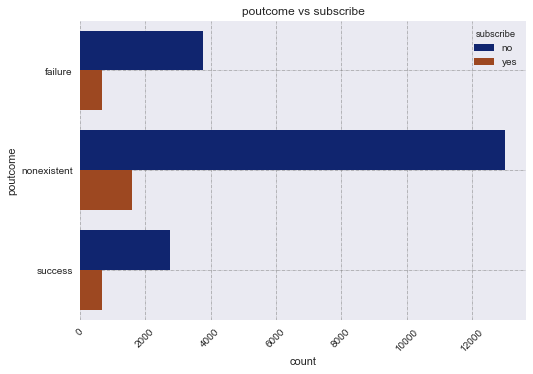

In [30]:
# compare_to_subscribe('poutcome')

In [31]:
# df['subscribe_count'] = df['subscribe']
# pivot_table = df.pivot_table(
#      index=['poutcome', 'subscribe'],
#      values='subscribe_count',
#     aggfunc=np.count_nonzero
# )
# df.drop(columns=['subscribe_count'], axis=1)
# display(pivot_table)

# pivot_table['subscribe*100/poutcome'] = np.nan

subscribe_count
poutcome    subscribe                 
failure     no                    3777
            yes                    665
nonexistent no                   13014
            yes                   1604
success     no                    2757
            yes                    683

In [32]:
# for i in range(0, len(pivot_table.index), len(df['subscribe'].unique())):
#     total = pivot_table.loc[pivot_table.index[i][0]]['subscribe_count'].sum()
#     pivot_table['subscribe*100/poutcome'][i] = pivot_table['subscribe_count'][i] * 100 / total
#     pivot_table['subscribe*100/poutcome'][i+1] = pivot_table['subscribe_count'][i+1] * 100 / total
# pivot_table

c:\users\yash meshram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\yash meshram\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


subscribe_count  subscribe*100/poutcome
poutcome    subscribe                                         
failure     no                    3777               85.029266
            yes                    665               14.970734
nonexistent no                   13014               89.027227
            yes                   1604               10.972773
success     no                    2757               80.145349
            yes                    683               19.854651

subscribe_count
marital  subscribe                 
divorced no                    2306
         yes                    352
married  no                   11767
         yes                   1411
single   no                    5301
         yes                   1043
unknown  no                     174
         yes                    146

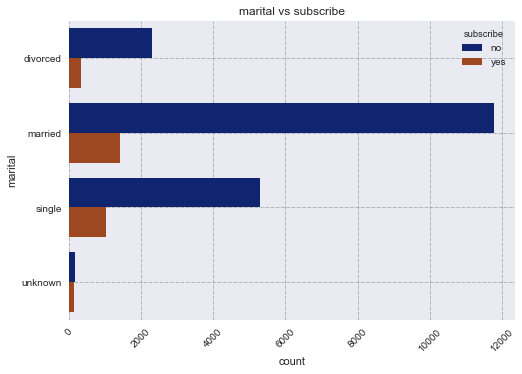

In [33]:
# compare_to_subscribe('marital')

In [22]:
# compare_to_subscribe('education')

In [23]:
# compare_to_subscribe('default')

In [24]:
# compare_to_subscribe('housing')

In [25]:
# compare_to_subscribe('loan')

In [26]:
# compare_to_subscribe('contact')

In [27]:
# compare_to_subscribe('month')

In [28]:
# compare_to_subscribe('day_of_week')